In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [323]:
class Environment(object):
    def __init__(self, num_bandits, std_min, std_max, offset_min, offset_max):
        self.bandits = []
        self.true_reward = []
        
        for _ in range(num_bandits):
            expected = np.random.randint(offset_min, offset_max)
            self.true_reward.append(expected)
            self.bandits.append(self._reward_dist(expected,
                                                  np.random.uniform(std_min, std_max)))
        
        self.true_reward = np.array(self.true_reward)
    
    def show(self, num_samples=1000):
        bandit_data = np.zeros((num_samples, len(self.bandits)))
        
        for sample in range(num_samples):
            for bandit in range(len(self.bandits)):
                bandit_data[sample][bandit] = next(self.bandits[bandit])
        
        plt.figure(figsize=(14, 8))
        plt.violinplot(bandit_data)
        plt.xlabel('Bandit')
        plt.ylabel('Reward Distribution')
        
    
    def do_action(self, a):
        return next(self.bandits[a])

    def num_actions(self):
        return len(self.bandits)
    
    def _reward_dist(self, offset, std):
        while True:
            yield np.random.normal(0, std) + offset

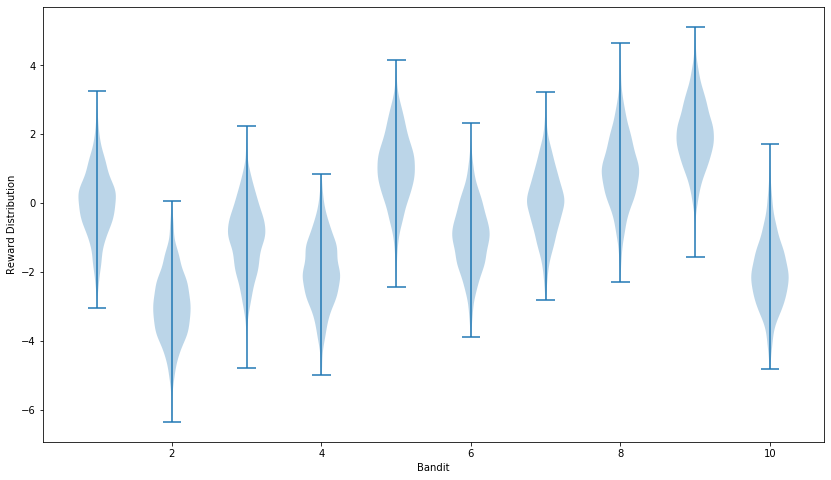

In [324]:
e = Environment(10, 1, 1, -3, 3)
e.show()

In [335]:
class Agent(object):
    def __init__(self, environment, epsilon):
        self.env = environment
        self.epsilon = epsilon
    
        self.expected_reward = np.zeros(self.env.num_actions())
        
        self.num_action_taken = np.zeros(self.env.num_actions())
        self.total_rewards = np.zeros(self.env.num_actions())
    
    def find_action(self):
        if np.random.random() < self.epsilon:   # explore
            #print('Exploring')
            return np.random.choice(range(self.env.num_actions()))
        else:                                   # greedy
            # list of actions with max expected reward
            max_actions = np.where(self.expected_reward==np.max(self.expected_reward))[0]
            # Select a random from these
            return np.random.choice(max_actions)
    
    def perform_action_and_update(self):
        action = self.find_action()
        reward = self.env.do_action(action)
    
        # TODO: Online update
        
        self.num_action_taken[action] += 1
        self.total_rewards[action] += reward
        
        # handle divide by zero
        with np.errstate(divide='ignore', invalid='ignore'):
            self.expected_reward = self.total_rewards / self.num_action_taken
            # NaN from zero division should be zero
            self.expected_reward = np.nan_to_num(self.expected_reward)
        
        #print(f'action taken: {action}, reward: {reward}')
        #print(f'expected rewards: {self.expected_reward}')
        #print('')
    
    def learn(self, num_iterations=10):
        for _ in range(num_iterations):
            self.perform_action_and_update()

a = Agent(e, 0.1)
a.learn(1000)

print(f'Agent expected rewards: {a.expected_reward}')
print(f'Environment actual rewards: {e.true_reward}')

error = np.abs(e.true_reward - a.expected_reward)

for b, err in enumerate(error):
    print(f'Bandir {b} - Actual: {e.true_reward[b]}, learned: {a.expected_reward[b]:.2f}, error: {err:.2f}')

Agent expected rewards: [ 0.19147464 -3.23149843 -0.99058571 -1.91370361  0.6405573  -0.76641965
 -0.60700947  1.0745698   2.00944452 -2.19431348]
Environment actual rewards: [ 0 -3 -1 -2  1 -1  0  1  2 -2]
Bandir 0 - Actual: 0, learned: 0.19, error: 0.19
Bandir 1 - Actual: -3, learned: -3.23, error: 0.23
Bandir 2 - Actual: -1, learned: -0.99, error: 0.01
Bandir 3 - Actual: -2, learned: -1.91, error: 0.09
Bandir 4 - Actual: 1, learned: 0.64, error: 0.36
Bandir 5 - Actual: -1, learned: -0.77, error: 0.23
Bandir 6 - Actual: 0, learned: -0.61, error: 0.61
Bandir 7 - Actual: 1, learned: 1.07, error: 0.07
Bandir 8 - Actual: 2, learned: 2.01, error: 0.01
Bandir 9 - Actual: -2, learned: -2.19, error: 0.19


In [273]:
arr1 = np.array([2, 2, 3, 3])
arr2 = np.array([2, 2, 2, 2])

arr1 / arr2

array([1. , 1. , 1.5, 1.5])